## Numerical Classification of Delays

In [105]:
import graph_utils

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

def categorize_flight_delays(file_path):
    """
    Categorizes flight delays into specified time intervals and prints statistics.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure the 'dep_delay' column is numeric
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    
    # Remove rows with missing 'dep_delay' values
    flights = flights.dropna(subset=['dep_delay'])
    
    # Categorize delays
    delay_intervals = {
        "On Time": flights['dep_delay'] <= 0,
        "0-30 mins": (flights['dep_delay'] > 0) & (flights['dep_delay'] <= 60),
        "30 mins - 1 hour": (flights['dep_delay'] > 30) & (flights['dep_delay'] <= 60),
        "1-2 hours": (flights['dep_delay'] > 60) & (flights['dep_delay'] <= 120),
        "2-3 hours": (flights['dep_delay'] > 120) & (flights['dep_delay'] <= 180),
        "Over 3 hours": flights['dep_delay'] > 180
    }
    
    # Count occurrences in each category
    counts = {category: flights[condition].shape[0] for category, condition in delay_intervals.items()}
    
    # Print the results
    print("Flight Delay Categories:")
    for category, count in counts.items():
        print(f"{category}: {count}")

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
categorize_flight_delays(file_path)

Flight Delay Categories:
On Time: 200089
0-30 mins: 101851
30 mins - 1 hour: 21710
1-2 hours: 16858
2-3 hours: 5830
Over 3 hours: 3893


## Graph of Delays by Category

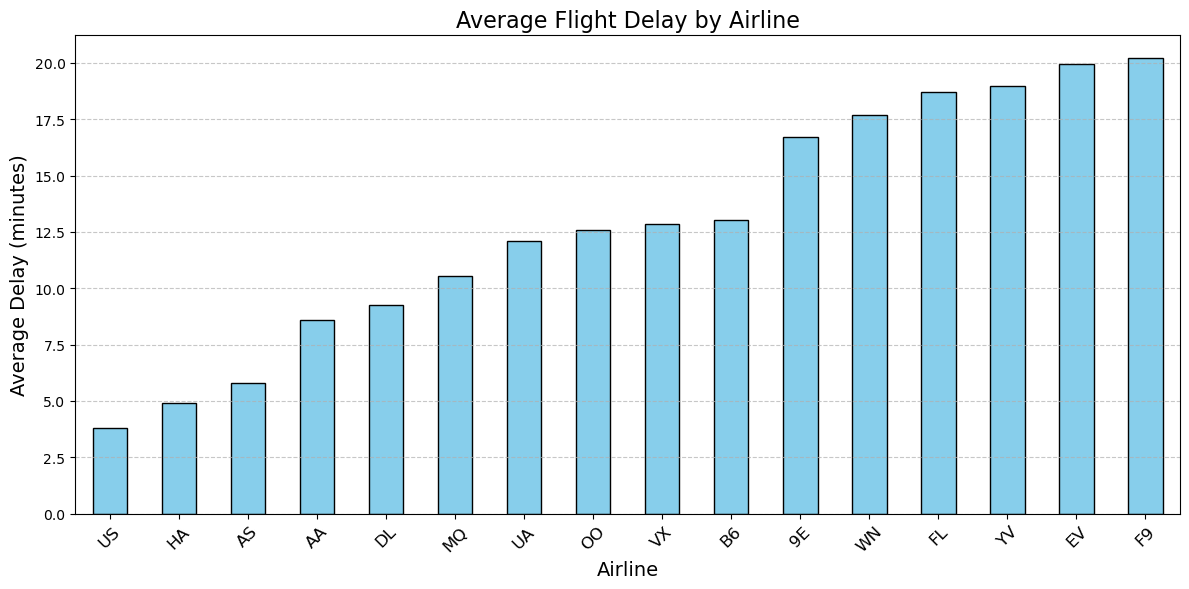

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_delays_by_airline(file_path):
    """
    Visualizes average flight delays by airline, considering only delayed flights.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure 'dep_delay' is numeric and 'carrier' exists
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    flights = flights.dropna(subset=['dep_delay', 'carrier'])
    
    # Filter only delayed flights
    delayed_flights = flights[flights['dep_delay'] > -1000]
    
    # Group by 'carrier' and calculate the average delay
    delay_by_airline = delayed_flights.groupby('carrier')['dep_delay'].mean().sort_values()
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    delay_by_airline.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Average Flight Delay by Airline", fontsize=16)
    plt.xlabel("Airline", fontsize=14)
    plt.ylabel("Average Delay (minutes)", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
visualize_delays_by_airline(file_path)


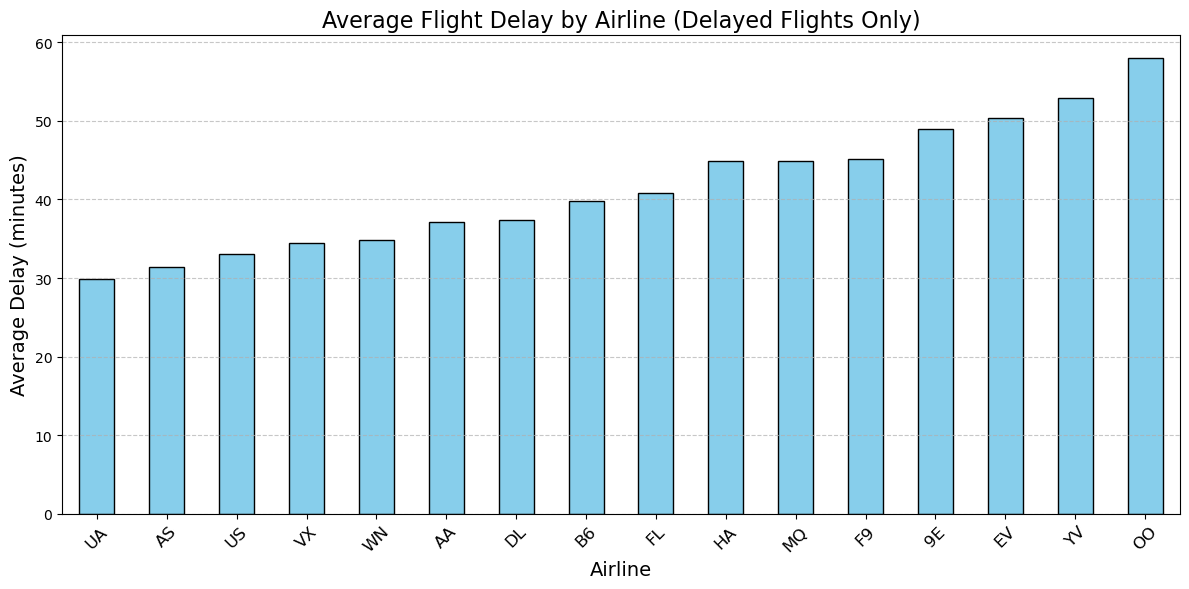

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_delays_by_airline(file_path):
    """
    Visualizes average flight delays by airline, considering only delayed flights.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure 'dep_delay' is numeric and 'carrier' exists
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    flights = flights.dropna(subset=['dep_delay', 'carrier'])
    
    # Filter only delayed flights
    delayed_flights = flights[flights['dep_delay'] > 0]
    
    # Group by 'carrier' and calculate the average delay
    delay_by_airline = delayed_flights.groupby('carrier')['dep_delay'].mean().sort_values()
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    delay_by_airline.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Average Flight Delay by Airline (Delayed Flights Only)", fontsize=16)
    plt.xlabel("Airline", fontsize=14)
    plt.ylabel("Average Delay (minutes)", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
visualize_delays_by_airline(file_path)


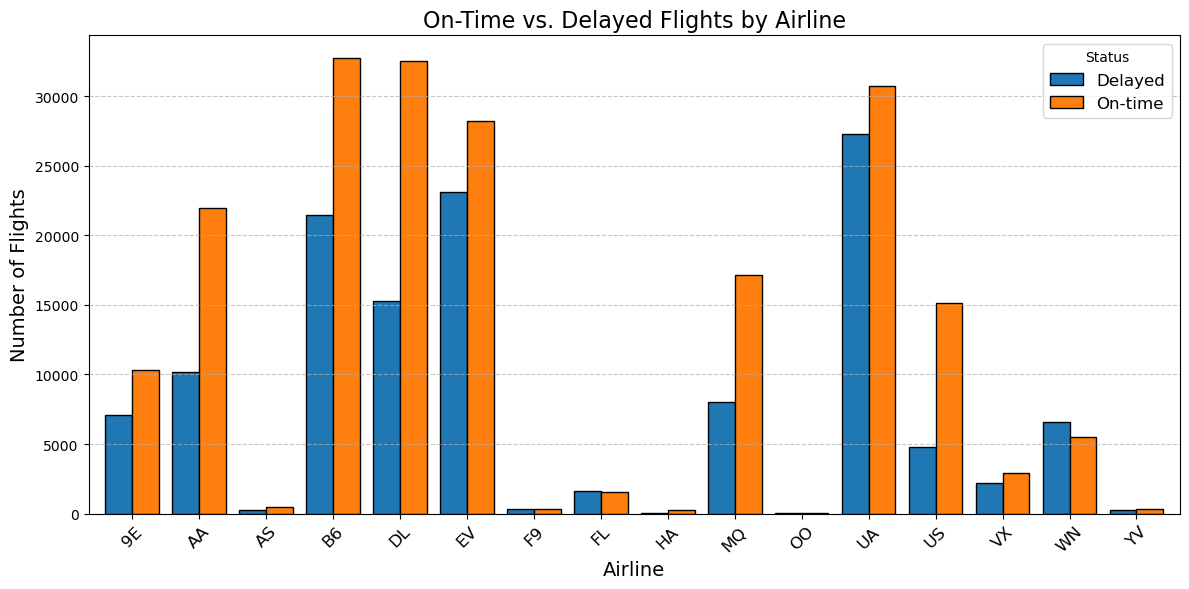

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def on_time_vs_delayed_by_airline(file_path):
    """
    Visualizes the number of on-time vs. delayed flights for each airline.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure 'dep_delay' is numeric and 'carrier' exists
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    flights = flights.dropna(subset=['dep_delay', 'carrier'])
    
    # Categorize flights as "on-time" or "delayed"
    flights['status'] = flights['dep_delay'].apply(lambda x: 'Delayed' if x > 0 else 'On-time')
    
    # Group by airline and status
    status_by_airline = flights.groupby(['carrier', 'status']).size().unstack(fill_value=0)
    
    # Plot the data
    status_by_airline.plot(kind='bar', figsize=(12, 6), edgecolor='black', width=0.8)
    plt.title("On-Time vs. Delayed Flights by Airline", fontsize=16)
    plt.xlabel("Airline", fontsize=14)
    plt.ylabel("Number of Flights", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Status", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
on_time_vs_delayed_by_airline(file_path)

## Revised Data (less airlines & destinations)

In [110]:
input_file = "flights.csv"
output_file = "revised_flights.csv"
graph_utils.filter_airlines(input_file, output_file)

Filtered data saved to revised_flights.csv. Number of rows: 281123


In [116]:
import pandas as pd

def filter_airlines(input_file, output_file):
    """
    Filters data to include only the major 8 airlines and destinations with more than 2,500 flights,
    and saves the result to a new CSV file.
    
    Parameters:
        input_file (str): The path to the input CSV file containing flight data.
        output_file (str): The path to save the filtered data as a CSV file.
    """
    # Load the data
    flights = pd.read_csv(input_file)
    
    # Define the list of major airline codes
    airline_codes = ['AA', 'B6', 'DL', 'EV', 'UA', 'US', 'WN']
    
    # Filter the data by the major airlines
    major_airlines_flights = flights[flights['carrier'].isin(airline_codes)]
    
    # Count the number of flights to each destination
    destination_counts = major_airlines_flights['dest'].value_counts()
    
    # Filter destinations with more than 2,500 flights
    valid_destinations = destination_counts[destination_counts > 2500].index
    
    # Filter the original dataset for these destinations
    filtered_flights = major_airlines_flights[major_airlines_flights['dest'].isin(valid_destinations)]
    
    # Save the filtered data to a new CSV file
    filtered_flights.to_csv(output_file, index=False)
    print(f"Filtered data saved to {output_file}. Number of rows: {len(filtered_flights)}")

filter_airlines(input_file, output_file)

Filtered data saved to revised_flights.csv. Number of rows: 223251


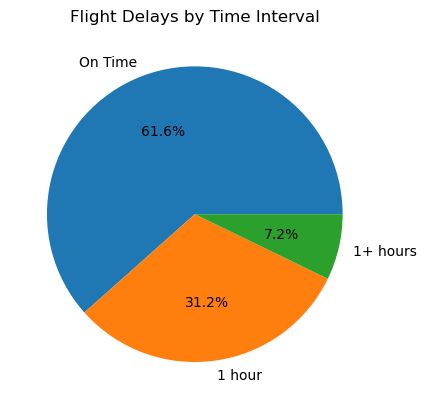

In [119]:
# Pie chart
flights = pd.read_csv('revised_flights.csv')

# Ensure the 'dep_delay' column is numeric
flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')

# Remove rows with missing 'dep_delay' values
flights = flights.dropna(subset=['dep_delay'])

# Categorize delays
delay_intervals = {
    "On Time": flights['dep_delay'] <= 0,
    "1 hour": (flights['dep_delay'] > 0) & (flights['dep_delay'] <= 60),
    "1+ hours": (flights['dep_delay'] > 60) 
}

# Count occurrences in each category
counts = {category: flights[condition].shape[0] for category, condition in delay_intervals.items()}

# Create a bar chart
categories = list(counts.keys())
values = list(counts.values())

plt.figure()
plt.title("Flight Delays by Time Interval")
plt.pie(values, labels=categories, autopct="%1.1f%%")
plt.show()

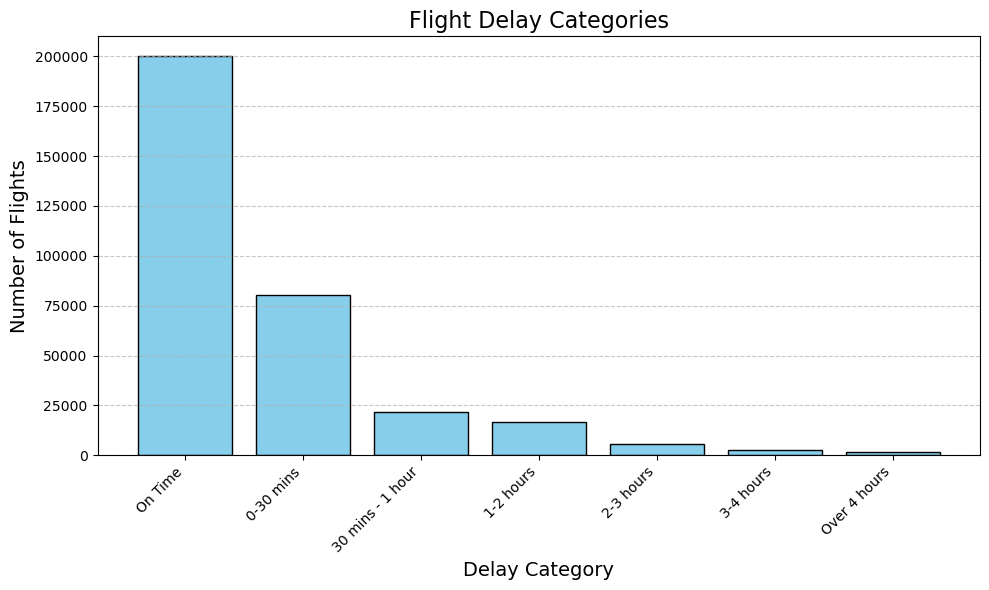

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_flight_delays(file_path):
    """
    Visualizes flight delays by categorizing them into specified time intervals.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure the 'dep_delay' column is numeric
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    
    # Remove rows with missing 'dep_delay' values
    flights = flights.dropna(subset=['dep_delay'])
    
    # Categorize delays
    delay_intervals = {
        "On Time": flights['dep_delay'] <= 0,
        "0-30 mins": (flights['dep_delay'] > 0) & (flights['dep_delay'] <= 30),
        "30 mins - 1 hour": (flights['dep_delay'] > 30) & (flights['dep_delay'] <= 60),
        "1-2 hours": (flights['dep_delay'] > 60) & (flights['dep_delay'] <= 120),
        "2-3 hours": (flights['dep_delay'] > 120) & (flights['dep_delay'] <= 180),
        "3-4 hours": (flights['dep_delay'] > 180) & (flights['dep_delay'] <= 240),
        "Over 4 hours": flights['dep_delay'] > 240
    }
    
    # Count occurrences in each category
    counts = {category: flights[condition].shape[0] for category, condition in delay_intervals.items()}
    
    # Create a bar chart
    categories = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='skyblue', edgecolor='black')
    plt.title("Flight Delay Categories", fontsize=16)
    plt.xlabel("Delay Category", fontsize=14)
    plt.ylabel("Number of Flights", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
visualize_flight_delays(file_path)


## Average Flight Delays By Time of Day
### Shows flights are more often delayed later in the day. Fairly linear relationship until about 7pm. 

C:\Users\izzym\AppData\Local\Temp\ipykernel_25156\3581953972.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_flights['sched_hour'] = (delayed_flights['sched_dep_time'] // 100).astype(int)


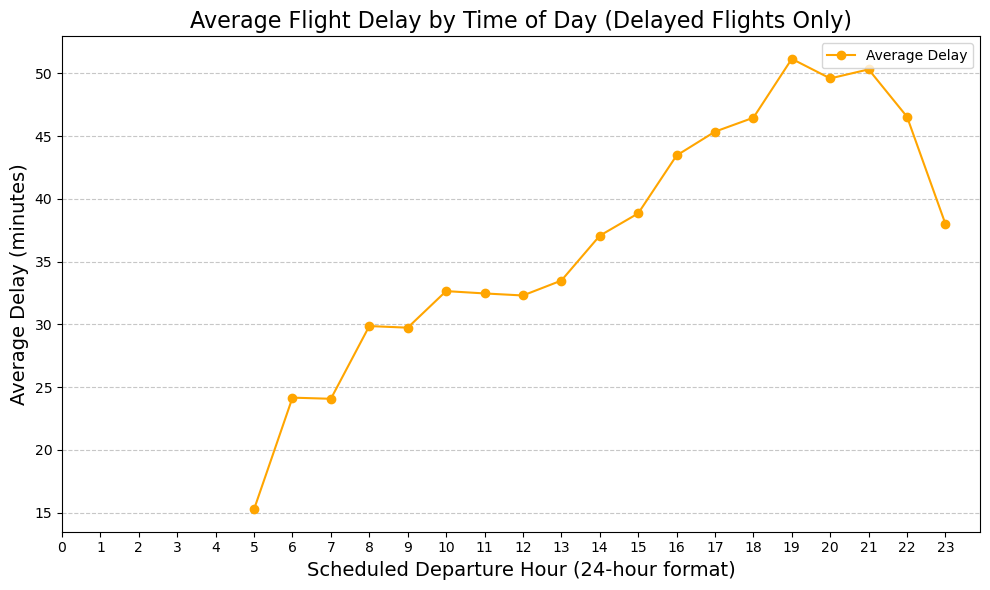

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_delays_by_time_of_day(file_path):
    """
    Visualizes flight delays by time of day, considering only delayed flights.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure 'dep_delay' is numeric and 'sched_dep_time' exists
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    flights = flights.dropna(subset=['dep_delay', 'sched_dep_time'])
    
    # Filter only delayed flights
    delayed_flights = flights[flights['dep_delay'] > 0]
    
    # Extract the hour from 'sched_dep_time'
    delayed_flights['sched_hour'] = (delayed_flights['sched_dep_time'] // 100).astype(int)
    
    # Group by 'sched_hour' and calculate the average delay
    delay_by_hour = delayed_flights.groupby('sched_hour')['dep_delay'].mean()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o', linestyle='-', color='orange', label='Average Delay')
    plt.title("Average Flight Delay by Time of Day (Delayed Flights Only)", fontsize=16)
    plt.xlabel("Scheduled Departure Hour (24-hour format)", fontsize=14)
    plt.ylabel("Average Delay (minutes)", fontsize=14)
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage
file_path = "flights.csv"  # Replace with the path to your CSV file
visualize_delays_by_time_of_day(file_path)


C:\Users\izzym\AppData\Local\Temp\ipykernel_25156\3787312912.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_flights['sched_hour'] = (delayed_flights['sched_dep_time'] // 100).astype(int)


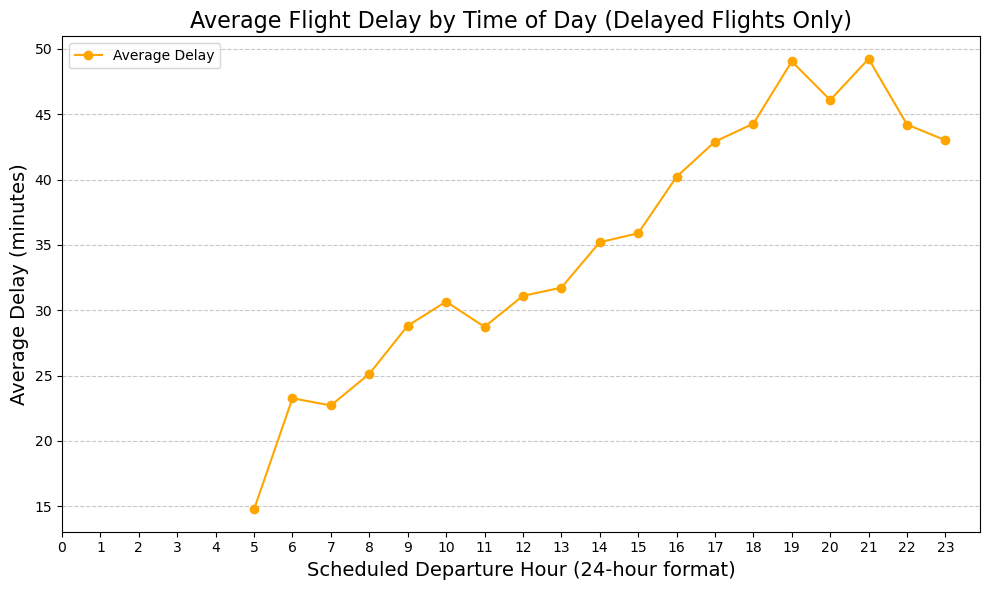

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_delays_by_time_of_day(file_path):
    """
    Visualizes flight delays by time of day, considering only delayed flights.
    
    Parameters:
        file_path (str): The path to the flights.csv file.
    """
    # Load the CSV file into a Pandas DataFrame
    flights = pd.read_csv(file_path)
    
    # Ensure 'dep_delay' is numeric and 'sched_dep_time' exists
    flights['dep_delay'] = pd.to_numeric(flights['dep_delay'], errors='coerce')
    flights = flights.dropna(subset=['dep_delay', 'sched_dep_time'])
    
    # Filter only delayed flights
    delayed_flights = flights[flights['dep_delay'] > 0]
    
    # Extract the hour from 'sched_dep_time'
    delayed_flights['sched_hour'] = (delayed_flights['sched_dep_time'] // 100).astype(int)
    
    # Group by 'sched_hour' and calculate the average delay
    delay_by_hour = delayed_flights.groupby('sched_hour')['dep_delay'].mean()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o', linestyle='-', color='orange', label='Average Delay')
    plt.title("Average Flight Delay by Time of Day (Delayed Flights Only)", fontsize=16)
    plt.xlabel("Scheduled Departure Hour (24-hour format)", fontsize=14)
    plt.ylabel("Average Delay (minutes)", fontsize=14)
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage
file_path = "revised_flights.csv"  # Replace with the path to your CSV file
visualize_delays_by_time_of_day(file_path)


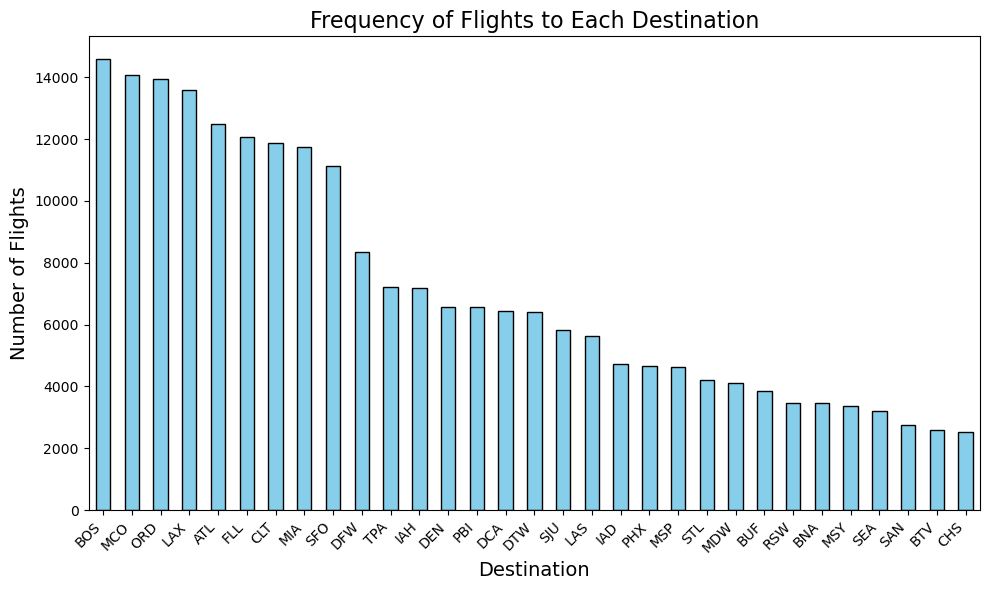

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_destination_frequency(input_file):
    """
    Plots the frequency of flights to each destination in the dataset.
    
    Parameters:
        input_file (str): The path to the input flights.csv file.
    """
    # Load the data
    flights = pd.read_csv(input_file)
    
    # Count the number of flights to each destination
    destination_counts = flights['dest'].value_counts()
    
    # Plot the data
    plt.figure(figsize=(10, 6))  # Set the figure size
    destination_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Add titles and labels
    plt.title('Frequency of Flights to Each Destination', fontsize=16)
    plt.xlabel('Destination', fontsize=14)
    plt.ylabel('Number of Flights', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

plot_destination_frequency('revised_flights.csv')
